<a href="https://colab.research.google.com/github/ahalyasanjiv/ChildhoodLeadExposure/blob/master/National_Level_Lead_Exposure.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploring Link between Lead Exposure and Poverty Level and Demographic Data by County

The data we will be using here is provided by [CDC](https://www.cdc.gov/nceh/lead/data/national.htm) (Centers for Disease Control and Prevention). The CDC has been collecting blood lead level surveillance data sice 1995, and the particular dataset we will be using is county level data across 26 states and includes the percentage of the population of the county that is living under the poverty line.

In this notebook, we will be investigating the link between lead exposure and the poverty level of each county. To accomplish this, we will use pandas and matplotlib. 

In [0]:
# Import necessary modules
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

First, let;s load the dataframe and check how it looks so we can decide what we may need to clean.


In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/ahalyasanjiv/ChildhoodLeadExposure/master/data/US_Lead_Testing.csv')

df.head()

,State,County,Population,Number of children tested,Percentage of children with levels higher than 5 ug/dl,Percentage of children with levels higher than 10 ug/dl,Percentage of population under the poverty line
0,AL,Autauga County,55136,29,Unknown,0,12.8
1,AL,Baldwin County,191205,357,1.7%,0.6,13.8
2,AL,Barbour County,27119,23,Unknown,4.3,24.1
3,AL,Bibb County,22653,41,Unknown,0,17.0
4,AL,Blount County,57645,250,1.2%,0,17.3


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1561 entries, 0 to 1560
Data columns (total 7 columns):
State                                                      1561 non-null object
County                                                     1561 non-null object
Population                                                 1561 non-null int64
Number of children tested                                  1561 non-null object
Percentage of children with levels higher than 5 ug/dl     1561 non-null object
Percentage of children with levels higher than 10 ug/dl    1561 non-null object
Percentage of population under the poverty line            1561 non-null float64
dtypes: float64(1), int64(1), object(5)
memory usage: 85.4+ KB


We notice that there are some unknowns in the dataset and also the datatypes are defined as objects for a few columns, when we would actually like them to be ints/floats. First, let's take care of dropping the rows with missing data. The reason for dropping rather than filling in with an educated guess is that a county can cover a large amount of people and nearby counties can differ in data greatly. If we do not have data for a particular county, we prefer to leave it out rather than trying to incorrectly assume.

In [4]:
# Drop rows with missing data
notAllowed = ['Unknown', 'Number of children tested']
df = df[~df['Percentage of children with levels higher than 5 ug/dl'].isin(notAllowed)]
df = df[~df['Percentage of children with levels higher than 10 ug/dl'].isin(notAllowed)]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1370 entries, 1 to 1560
Data columns (total 7 columns):
State                                                      1370 non-null object
County                                                     1370 non-null object
Population                                                 1370 non-null int64
Number of children tested                                  1370 non-null object
Percentage of children with levels higher than 5 ug/dl     1370 non-null object
Percentage of children with levels higher than 10 ug/dl    1370 non-null object
Percentage of population under the poverty line            1370 non-null float64
dtypes: float64(1), int64(1), object(5)
memory usage: 85.6+ KB


From what we see above by running df.info() again, about 12% of the original rows were dropped, but we still have a sizable amount of data to make predictions off of.

Now we will convert some of the columns from an object type to a float type.

In [0]:
# Clean the rows for the percentage sign and then convert to float type

float_cols = ['Percentage of children with levels higher than 5 ug/dl',
       'Percentage of children with levels higher than 10 ug/dl']

for col in float_cols: 
  df[col] = df[col].str.replace('Less than 5', '0.0')
  df[col] = df[col].str.rstrip('%')
  df = df.astype({col: float})

Now that the data is in the format we woul like it to be, we are ready to create a scatterplot to see the correlation between the percentage of children with lead levels greater than 5 ug/dl and the % of the population living under the poverty line. We expect there to be a positive correlation.

Text(0, 0.5, 'Percentage of population under the poverty line')

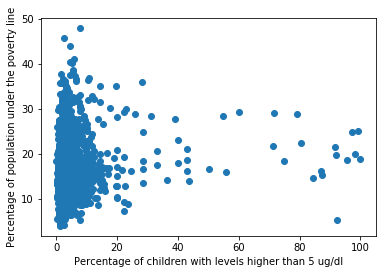

In [6]:
# Create a scatterplot between % children with lead levels > 5 ug/dl and % population living under poverty line
plt.scatter(df['Percentage of children with levels higher than 5 ug/dl'],df['Percentage of population under the poverty line'])
plt.xlabel('Percentage of children with levels higher than 5 ug/dl')
plt.ylabel('Percentage of population under the poverty line')

The correlation as shown above is generally positive, but only slightly so. To get a better idea, we can get the correlation coefficient between these two colums.

In [7]:
# Check the correlation between these two columns
df['Percentage of children with levels higher than 5 ug/dl'].corr(df['Percentage of population under the poverty line'])

0.09065190229006952

In [8]:
# Drop columns we won't use 
df = df.drop(['Population','Number of children tested'], axis=1)

lead_df = df

# Load census data into df
df = pd.read_csv('https://raw.githubusercontent.com/ahalyasanjiv/ChildhoodLeadExposure/master/data/acs2017_county_data.csv')

# Check if the format of the different columns
df.head()

,CountyId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,VotingAgeCitizen,Income,IncomeErr,IncomePerCap,IncomePerCapErr,Poverty,ChildPoverty,Professional,Service,Office,Construction,Production,Drive,Carpool,Transit,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,1001,Alabama,Autauga County,55036,26899,28137,2.7,75.4,18.9,0.3,0.9,0.0,41016,55317,2838,27824,2024,13.7,20.1,35.3,18.0,23.2,8.1,15.4,86.0,9.6,0.1,0.6,1.3,2.5,25.8,24112,74.1,20.2,5.6,0.1,5.2
1,1003,Alabama,Baldwin County,203360,99527,103833,4.4,83.1,9.5,0.8,0.7,0.0,155376,52562,1348,29364,735,11.8,16.1,35.7,18.2,25.6,9.7,10.8,84.7,7.6,0.1,0.8,1.1,5.6,27.0,89527,80.7,12.9,6.3,0.1,5.5
2,1005,Alabama,Barbour County,26201,13976,12225,4.2,45.7,47.8,0.2,0.6,0.0,20269,33368,2551,17561,798,27.2,44.9,25.0,16.8,22.6,11.5,24.1,83.4,11.1,0.3,2.2,1.7,1.3,23.4,8878,74.1,19.1,6.5,0.3,12.4
3,1007,Alabama,Bibb County,22580,12251,10329,2.4,74.6,22.0,0.4,0.0,0.0,17662,43404,3431,20911,1889,15.2,26.6,24.4,17.6,19.7,15.9,22.4,86.4,9.5,0.7,0.3,1.7,1.5,30.0,8171,76.0,17.4,6.3,0.3,8.2
4,1009,Alabama,Blount County,57667,28490,29177,9.0,87.4,1.5,0.3,0.1,0.0,42513,47412,2630,22021,850,15.6,25.4,28.5,12.9,23.3,15.8,19.5,86.8,10.2,0.1,0.4,0.4,2.1,35.0,21380,83.9,11.9,4.0,0.1,4.9


In order to join this dataset with the previous one, first we will need to convert the state names to their abbreviation so we can join on state and county (since the previous dataset uses state abbreviations).

In [0]:
# Dictionary mapping states to their abbreviations
us_state_abbrev = { 'Alabama': 'AL', 'Alaska': 'AK', 'Arizona': 'AZ', 'Arkansas': 'AR', 'California': 'CA', 'Colorado': 'CO', 'Connecticut': 'CT', 'Delaware': 'DE', 'Florida': 'FL', 'Georgia': 'GA', 'Hawaii': 'HI', 'Idaho': 'ID', 'Illinois': 'IL', 'Indiana': 'IN', 'Iowa': 'IA', 'Kansas': 'KS', 'Kentucky': 'KY', 'Louisiana': 'LA', 'Maine': 'ME', 'Maryland': 'MD', 'Massachusetts': 'MA', 'Michigan': 'MI', 'Minnesota': 'MN', 'Mississippi': 'MS', 'Missouri': 'MO', 'Montana': 'MT', 'Nebraska': 'NE', 'Nevada': 'NV', 'New Hampshire': 'NH', 'New Jersey': 'NJ', 'New Mexico': 'NM', 'New York': 'NY', 'North Carolina': 'NC', 'North Dakota': 'ND', 'Ohio': 'OH', 'Oklahoma': 'OK', 'Oregon': 'OR', 'Pennsylvania': 'PA', 'Rhode Island': 'RI', 'South Carolina': 'SC', 'South Dakota': 'SD', 'Tennessee': 'TN', 'Texas': 'TX', 'Utah': 'UT', 'Vermont': 'VT', 'Virginia': 'VA', 'Washington': 'WA', 'West Virginia': 'WV', 'Wisconsin': 'WI', 'Wyoming': 'WY', }

# Replace each value in the State column with its abbreviation using the dictionary
df = df.replace({"State": us_state_abbrev})

There are a lot of columns in this dataset and we don't plan to use them all. To simplify things, let's select the ones we want and drop the rest.

In [10]:
# Select the columns we want from the original dataset
df = df[['State', 'County', 'TotalPop', 'Men', 'Women', 'Hispanic',
       'White', 'Black', 'Native', 'Asian', 'Pacific',
       'Income', 'IncomePerCap', 'Poverty',
       'ChildPoverty','Unemployment']]

# Check new df to make sure changes were as expected
df.head()

,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,Income,IncomePerCap,Poverty,ChildPoverty,Unemployment
0,AL,Autauga County,55036,26899,28137,2.7,75.4,18.9,0.3,0.9,0.0,55317,27824,13.7,20.1,5.2
1,AL,Baldwin County,203360,99527,103833,4.4,83.1,9.5,0.8,0.7,0.0,52562,29364,11.8,16.1,5.5
2,AL,Barbour County,26201,13976,12225,4.2,45.7,47.8,0.2,0.6,0.0,33368,17561,27.2,44.9,12.4
3,AL,Bibb County,22580,12251,10329,2.4,74.6,22.0,0.4,0.0,0.0,43404,20911,15.2,26.6,8.2
4,AL,Blount County,57667,28490,29177,9.0,87.4,1.5,0.3,0.1,0.0,47412,22021,15.6,25.4,4.9


Now we are ready to join the two datasets. 

In [11]:
demographics_df = df

# Join the two dataframes on the zip code column
df = pd.merge(lead_df, demographics_df,  how='inner', left_on=['State','County'], right_on = ['State','County'])

df.head()

,State,County,Percentage of children with levels higher than 5 ug/dl,Percentage of children with levels higher than 10 ug/dl,Percentage of population under the poverty line,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,Income,IncomePerCap,Poverty,ChildPoverty,Unemployment
0,AL,Baldwin County,1.7,0.6,13.8,203360,99527,103833,4.4,83.1,9.5,0.8,0.7,0.0,52562,29364,11.8,16.1,5.5
1,AL,Blount County,1.2,0.0,17.3,57667,28490,29177,9.0,87.4,1.5,0.3,0.1,0.0,47412,22021,15.6,25.4,4.9
2,AL,Bullock County,5.4,0.7,20.5,10478,5616,4862,0.3,21.6,75.6,1.0,0.7,0.0,29655,20856,28.5,50.4,12.1
3,AL,Butler County,2.0,0.0,25.9,20126,9416,10710,0.3,52.2,44.7,0.1,1.1,0.0,36326,19004,24.4,34.8,7.6
4,AL,Calhoun County,5.2,1.5,21.7,115527,55593,59934,3.6,72.7,20.4,0.2,1.0,0.0,43686,23638,18.6,26.6,10.1


With this new dataframe, let us look at the correlation coefficients. 

In [15]:
df.corr()['Percentage of children with levels higher than 5 ug/dl']

Percentage of children with levels higher than 5 ug/dl     1.000000
Percentage of children with levels higher than 10 ug/dl    0.305873
Percentage of population under the poverty line            0.090726
TotalPop                                                  -0.032554
Men                                                       -0.032975
Women                                                     -0.032149
Hispanic                                                   0.389454
White                                                     -0.196925
Black                                                     -0.009767
Native                                                     0.064107
Asian                                                     -0.060347
Pacific                                                    0.001907
Income                                                    -0.113483
IncomePerCap                                              -0.073427
Poverty                                         

Text(0, 0.5, 'Percentage of Hispanics')

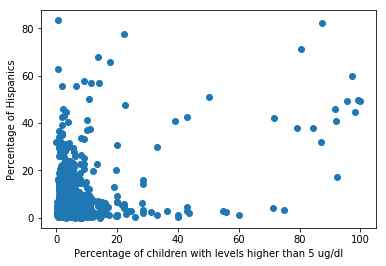

In [17]:
plt.scatter(df['Percentage of children with levels higher than 5 ug/dl'],df['Hispanic'])
plt.xlabel('Percentage of children with levels higher than 5 ug/dl')
plt.ylabel('Percentage of Hispanics')

When we look at national data, we see slightly different results than what we saw for NYS data. Here, the percentage of hispanics is the columns that is has the most significant correlation with the percentage of children with levels higher than 5 ug/dl (~ 0.39!). This dataset is taken by county whereas the other was taken by zip code, allowing for greater granularity, which may explain the differences.

Correlation with % of whites is -0.19 here, whereas it was about -0.23 in NYS which is pretty close. The correlation with % of blacks seems to be the most unexpected, and quite different than what we saw in NYS. However, this does not mean there is no correlation at a national level. We have to keep in mind that NYS tends to collect more surveillance data across its counties in comparison to other states. There are many cases of places in the US where little to no data is collected regarding lead levels. 

The correlation with income and poverty is slightly stronger than what we saw in the NYS data at around -0.11 for income and 0.12 for poverty.